Чем отличается выборочная от исправной

In [30]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Необходимо вычислить</h2>

Вариационный ряд, экстремальные значения и размах, оценки математического
ожидания и среднеквадратического отклонения, эмпирическую функцию распределения и её
график, гистограмму и полигон приведенных частот группированной выборки

<h1>Данные</h1>

In [31]:
data = np.array([0.41, 1.63, -1.53, -0.20, 0.85, 0.09, 1.54, 0.25, 1.24, -0.26, 
1.08, 0.42, -0.92, -0.91, 1.15, -0.82, 0.26, 0.96, 1.57, 0.72], dtype=float)

<h1>Вариационный ряд</h1>

In [32]:
variation_series = np.sort(data)

print(*variation_series)

-1.53 -0.92 -0.91 -0.82 -0.26 -0.2 0.09 0.25 0.26 0.41 0.42 0.72 0.85 0.96 1.08 1.15 1.24 1.54 1.57 1.63


<h1>Экстремальные значения и размах</h1>

In [33]:
max_value = np.max(data)
min_value = np.min(data)
spread = max_value - min_value

print("Максимальное значение: ", max_value)
print("Минимальное значение: ", min_value)
print("Размах: ", spread)

Максимальное значение:  1.63
Минимальное значение:  -1.53
Размах:  3.16


<h1>Математическое ожидание</h1>
<h3>Статистичиский ряд</h3>

In [34]:
unique_elements, counts = np.unique(variation_series, return_counts=True)
statistical_series = np.array([[key, value] for key, value in zip(unique_elements, counts)])

mean = round(sum(x * n for x, n in statistical_series) / sum(n for _, n in statistical_series), 5)

print("Статистический ряд: ", statistical_series)
mean


Статистический ряд:  [[-1.53  1.  ]
 [-0.92  1.  ]
 [-0.91  1.  ]
 [-0.82  1.  ]
 [-0.26  1.  ]
 [-0.2   1.  ]
 [ 0.09  1.  ]
 [ 0.25  1.  ]
 [ 0.26  1.  ]
 [ 0.41  1.  ]
 [ 0.42  1.  ]
 [ 0.72  1.  ]
 [ 0.85  1.  ]
 [ 0.96  1.  ]
 [ 1.08  1.  ]
 [ 1.15  1.  ]
 [ 1.24  1.  ]
 [ 1.54  1.  ]
 [ 1.57  1.  ]
 [ 1.63  1.  ]]


0.3765

<h1>Среднеквадратическое отклонение </h1>
<h3>Выборочная дисперсия</h3>

In [35]:
dispersion = round(sum(((x-mean)**2) * n for x, n in statistical_series) / sum(n for _, n in statistical_series), 5  )
standart_deviation = round(np.sqrt(dispersion),5)
print("Дисперсия: ", dispersion)
print("Среднеквадратическое отклонение: ", standart_deviation)


Дисперсия:  0.80627
Среднеквадратическое отклонение:  0.89793


<h1>Эмперическая функция распределения</h1>
<h3>График</h3>

In [36]:
def empirical_distribution_function(x):
    freq = 0
    for i in range(len(statistical_series)):
        if statistical_series[i][0] >= x:
            break
        freq += statistical_series[i][1]
    return freq / len(data)

x < -1.53:	F(x) = 0.0
-1.53 <= x < -0.92:	F(x) = 0.05
-0.92 <= x < -0.91:	F(x) = 0.1
-0.91 <= x < -0.82:	F(x) = 0.15
-0.82 <= x < -0.26:	F(x) = 0.2
-0.26 <= x < -0.2:	F(x) = 0.25
-0.2 <= x < 0.09:	F(x) = 0.3
0.09 <= x < 0.25:	F(x) = 0.35
0.25 <= x < 0.26:	F(x) = 0.4
0.26 <= x < 0.41:	F(x) = 0.45
0.41 <= x < 0.42:	F(x) = 0.5
0.42 <= x < 0.72:	F(x) = 0.55
0.72 <= x < 0.85:	F(x) = 0.6
0.85 <= x < 0.96:	F(x) = 0.65
0.96 <= x < 1.08:	F(x) = 0.7
1.08 <= x < 1.15:	F(x) = 0.75
1.15 <= x < 1.24:	F(x) = 0.8
1.24 <= x < 1.54:	F(x) = 0.85
1.54 <= x < 1.57:	F(x) = 0.9
1.57 <= x < 1.63:	F(x) = 0.95
1.63 <= x:	F(x) = 1.0


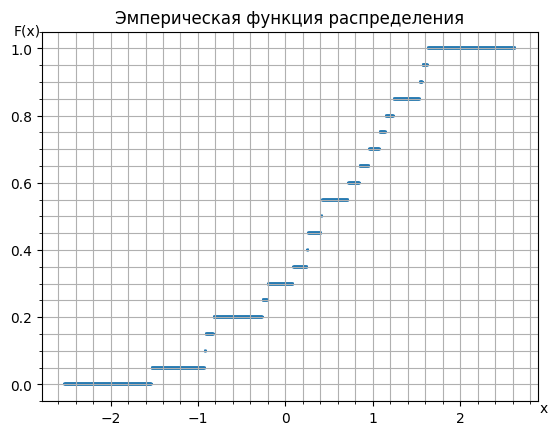

In [37]:
freq = 0
print(f"x < {statistical_series[0][0]}:\tF(x) = {freq / len(statistical_series)}")
for i in range(len(statistical_series) - 1):
    freq += statistical_series[i][1]
    print(
        f"{statistical_series[i][0]} <= x < {statistical_series[i+1][0]}:\tF(x) = {freq / len(statistical_series)}")
freq += statistical_series[-1][1]
print(f"{statistical_series[-1][0]} <= x:\tF(x) = {freq / len(statistical_series)}")

x_values = np.linspace(min_value - 1, max_value + 1, 10000)
ecdf_values = [empirical_distribution_function(x)
                for x in x_values]
plt.grid(which='both')
plt.minorticks_on()
plt.scatter(x_values, ecdf_values, marker='_', s=1)
plt.xlabel('x', ha='right', x=1.0)
plt.ylabel('F(x)', va='top', y=1.0)
plt.gca().yaxis.set_label_coords(-0.03, 1.02)
plt.gca().yaxis.get_label().set_rotation(0)
plt.gca().xaxis.set_label_coords(1.02, 0)
plt.title('Эмперическая функция распределения')

plt.show()

<h3>Гистограмма приведенных частот группированной выборки</h3>

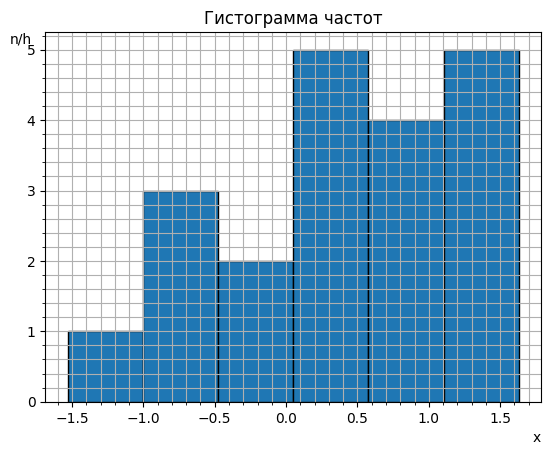

In [38]:

num_bins = 6
hist, bins = np.histogram(data, bins=bins_num)
plt.hist(variation_series, bins=num_bins, edgecolor='black')
plt.grid(which='both')
plt.minorticks_on()
plt.title('Гистограмма частот')
plt.xlabel('x', ha='right', x=1.0)
plt.ylabel('n/h', va='top', y=1.0)
plt.gca().yaxis.get_label().set_rotation(0)
plt.show()

<h3>Полигон приведенных частот группированной выборки</h3>

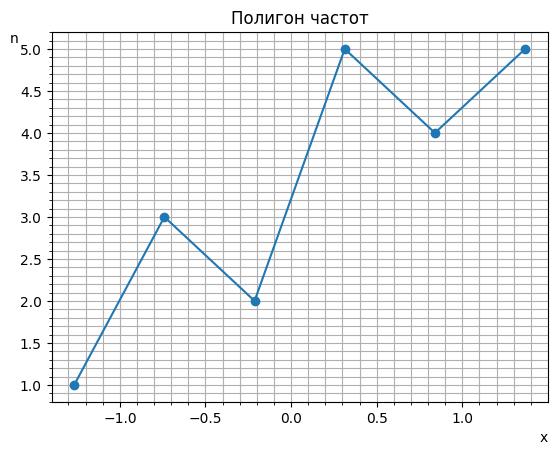

In [39]:
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, hist, marker='o', linestyle='-')
plt.grid(which='both')
plt.minorticks_on()
plt.title('Полигон частот')
plt.xlabel('x', ha='right', x=1.0)
plt.ylabel('n', va='top', y=1.0)
plt.gca().yaxis.get_label().set_rotation(0)
plt.show()